# 9장. 텍스트를 분류합니다

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/do-it-dl/blob/master/Ch09.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/do-it-dl/blob/master/Ch09.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

이 노트북을 실행하려면 텐서플로 2.0.0-alpha0 버전 이상이 필요합니다. 코랩을 사용할 때는 다음 셀의 주석을 제거하고 GPU 버전의 텐서플로 2.0.0 버전을 설치하세요.

In [14]:
#!pip install tensorflow-gpu==2.0.0

## 09-2 순환 신경망을 만듭니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=10, num_words=100)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
c:\Users\KJH0517\anaconda3\envs\AI_Lecture\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\KJH0517\anaconda3\envs\AI_Lecture\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [3]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [5]:
print(x_train_all[0])

[14, 22, 16, 43, 65, 66, 36, 25, 43, 50, 35, 39, 17, 38, 13, 50, 16, 19, 14, 22, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 22, 17, 17, 12, 16, 18, 62, 12, 16, 66, 33, 12, 16, 38, 25, 51, 36, 48, 25, 33, 22, 12, 28, 77, 52, 14, 16, 82, 15, 36, 71, 43, 26, 46, 13, 88, 15, 98, 32, 56, 26, 18, 22, 21, 26, 30, 18, 51, 36, 28, 92, 25, 65, 16, 38, 88, 12, 16, 16, 32, 15, 16, 19, 32]


In [6]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    # 0과 1과 2는 리뷰와 관련이 없기 때문에 제외시킨다.

print(x_train_all[0])

[14, 22, 16, 43, 65, 66, 36, 25, 43, 50, 35, 39, 17, 38, 13, 50, 16, 19, 14, 22, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 22, 17, 17, 12, 16, 18, 62, 12, 16, 66, 33, 12, 16, 38, 25, 51, 36, 48, 25, 33, 22, 12, 28, 77, 52, 14, 16, 82, 15, 36, 71, 43, 26, 46, 13, 88, 15, 98, 32, 56, 26, 18, 22, 21, 26, 30, 18, 51, 36, 28, 92, 25, 65, 16, 38, 88, 12, 16, 16, 32, 15, 16, 19, 32]


In [7]:
word_to_index = imdb.get_word_index()

word_to_index['movie']

17

In [8]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w - 3], end=' ')

this film was just story really they you just there an from as so i there was with this film film were great it was just so much that i film as as it was for would it was really at it was so you what they if you at film it have been good this was also that they were just are out i because that them all up are for film but are be for what they have don't you story was so because it was was all that was with all 

In [9]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [10]:
print(len(x_train_all[0]), len(x_train_all[1]))

94 46


In [11]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [14]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [15]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [16]:
print(x_train_seq.shape, x_val_seq.shape)
#리뷰 2만개에 각각 100개의 단어로 되어있다.

(20000, 100) (5000, 100)


In [17]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 19 40 12
 22 83 11 15 17 31 85 14 45 24 23 31 70 31 76 30 11 17 98 17 17 12 32 14
 22 15 28 11 51 75 56 19 30 33 97 53 38 17 46 15 53 74 11 31 35 23 34 14
 22 11 14 58]


In [20]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)
# x_train_seq 가 'movie'라는 단어이고, 'movie'의 imdb의 index에서 17일 경우
# x_train_onehot 은 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0....
# -> 17번째가 1로 표시됨

In [21]:
print(x_train_onehot.shape)
# 20000 = 리뷰 갯수, 100 = , 100 =
# 20000개의 x_train_seq -> 1개의 x_train_seq에 100개의 단어가 있다.
# 100개의 단어 중 1개의 단어 마다 100개의 셀(100 비트)로 onehot-encoding이 되어있다.

(20000, 100, 100)


In [22]:
print(x_train_onehot.nbytes)

800000000


In [23]:
import tensorflow as tf

In [26]:
class RecurrentNetwork:
    # Magic function : __****__   
    # self = 이 함수를 호출한 객체의 주소
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수 => 셀의 가중치 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다. -> h = [x.shape[0], self.n_cells] 2차원 배열이 됨
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        # x = (리뷰 갯수, 단어 갯수, 단어 원핫 인코딩)
        #   = (32, 100, 100)
        # 왜? -> 리뷰 1개당 단어가 100개 들어가있음. -> 첫번째 단어 1개가 32개씩 있음
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [28]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

In [27]:
import matplotlib.pyplot as plt

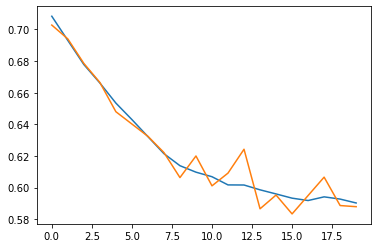

In [ ]:
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [ ]:
rn.score(x_val_onehot, y_val)

0.6866

## 09-3 텐서플로로 순환 신경망을 만듭니다

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 9s 14ms/step - loss: 0.7014 - accuracy: 0.5075 - val_loss: 0.6935 - val_accuracy: 0.5166
Epoch 2/20
625/625 [==============================] - 8s 14ms/step - loss: 0.6930 - accuracy: 0.5232 - val_loss: 0.6933 - val_accuracy: 0.5148
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6906 - accuracy: 0.5315 - val_loss: 0.6892 - val_accuracy: 0.5336
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6878 - accuracy: 0.5385 - val_loss: 0.6854 - val_accuracy: 0.5474
Epoch 5/20
625/625 [==============================] - 8s 14ms/step - loss: 0.6815 - accuracy: 0.5574 - val_loss: 0.6782 - val_accuracy: 0.5620
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6699 - accuracy: 0.5890 - val_loss: 0.6465 - val_accuracy: 0.6366
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.6504 - accuracy: 0.6231 - val_loss: 0.6348 - val_accuracy: 0.6500

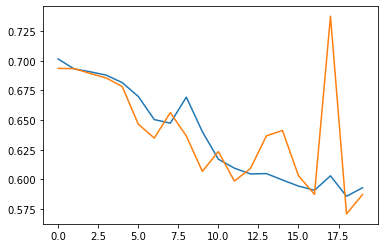

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

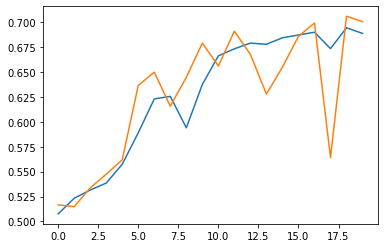

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.7008000016212463


In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [ ]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 12s 18ms/step - loss: 0.6108 - accuracy: 0.6470 - val_loss: 0.5040 - val_accuracy: 0.7670
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.4537 - accuracy: 0.7994 - val_loss: 0.4584 - val_accuracy: 0.8036
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4032 - accuracy: 0.8273 - val_loss: 0.4794 - val_accuracy: 0.7858
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3746 - accuracy: 0.8401 - val_loss: 0.4856 - val_accuracy: 0.7958
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 0.3335 - accuracy: 0.8626 - val_loss: 0.4621 - val_accuracy: 0.8066
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3009 - accuracy: 0.8794 - val_loss: 0.4666 - val_accuracy: 0.8084
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 0.2753 - accuracy: 0.8922 - val_loss: 0.4986 - val_accuracy:

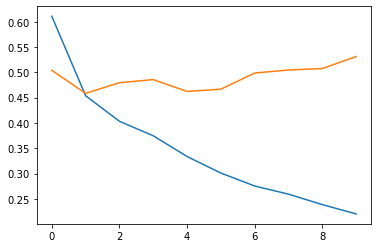

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

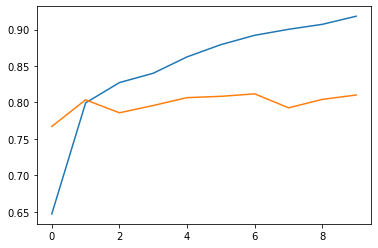

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8101999759674072


## 09-4 LSTM 순환 신경망으로 텍스트를 분류합니다

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 19s 28ms/step - loss: 0.4508 - accuracy: 0.7954 - val_loss: 0.3738 - val_accuracy: 0.8354
Epoch 2/10
625/625 [==============================] - 16s 26ms/step - loss: 0.3331 - accuracy: 0.8598 - val_loss: 0.3603 - val_accuracy: 0.8450
Epoch 3/10
625/625 [==============================] - 16s 26ms/step - loss: 0.3089 - accuracy: 0.8718 - val_loss: 0.3671 - val_accuracy: 0.8402
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.2933 - accuracy: 0.8760 - val_loss: 0.3725 - val_accuracy: 0.8448
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 0.2801 - accuracy: 0.8841 - val_loss: 0.3684 - val_accuracy: 0.8362
Epoch 6/10
625/625 [==============================] - 16s 26ms/step - loss: 0.2670 - accuracy: 0.8891 - val_loss: 0.3703 - val_accuracy: 0.8392
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.2573 - accuracy: 0.8942 - val_loss: 0.3769 - val_accuracy:

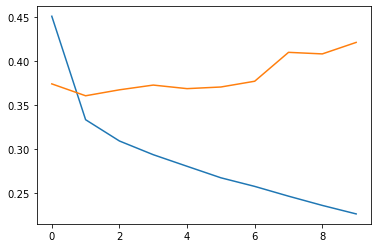

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

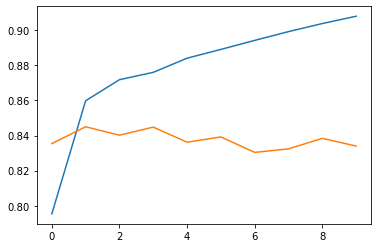

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8339999914169312
